In [1]:
# load useful packages
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
## main cell type colours 
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
col_NB = "#ff7f0e"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#9467bd"

In [3]:
## other cell type colours 
col_Epen2 = '#c5b0d5'
col_P_Sert = '#8c564b'
col_U_Neur1 = '#ffbb78'
col_U_Neur2 = '#d62728'
col_U_Neur3 = '#c49c94'

In [4]:
ordering = c("FPP","P_FPP","NB","DA","Sert","P_Sert","Astro","Epen1","Epen2","U_Neur1","U_Neur2","U_Neur3")
cols = c(col_FPP,col_P_FPP,col_NB,col_DA,col_Sert,col_P_Sert,col_Astro,col_Epen1,col_Epen2,col_U_Neur1,col_U_Neur2,col_U_Neur3)

In [5]:
### Day 52 fraction of cells 
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
mysuffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point-treatment.celltype_fractions.tsv"
# mysuffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.celltype_fractions.tsv"


myfilename = paste0(mydir,mysuffix)
myfile = read.table(myfilename, header = T)
head(myfile,2)

donor_id,pool_id,time_point,treatment,celltype,f_cells
HPSI0114i-bezi_3,pool10,D52,NONE,Astro,0.009174312
HPSI0114i-bezi_3,pool10,D52,NONE,CHem,0.022935780


In [6]:
df = myfile
df$celltype <- as.character(df$celltype)
df$celltype[df$celltype == "CHem"] <- "U_Neur1"
df$celltype[df$celltype == "unknown"] <- "U_Neur3"
myfile = df

In [7]:
myfile$order = c()
for (i in 1:length(ordering)){
    if (ordering[i] %in% myfile$celltype){
        myfile[myfile$celltype == ordering[i],'order'] <-  i
    }   
}

myfile = myfile[order(myfile$order),]
df = myfile

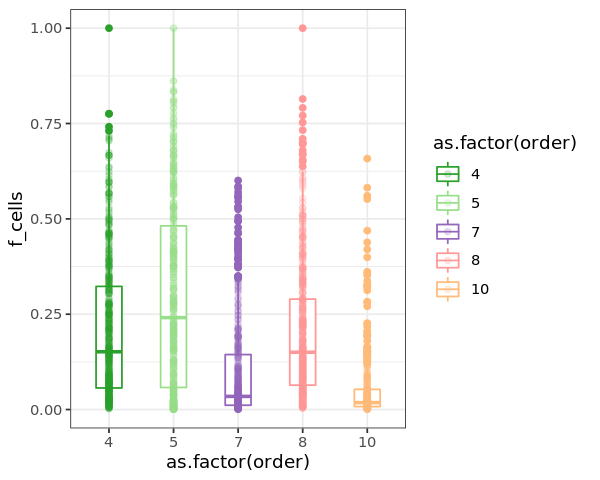

In [8]:
options(repr.plot.width=5, repr.plot.height=4)
df0 = df[df$celltype %in% c("DA","Sert","Astro","Epen1","U_Neur1"),]
ggplot(df0, aes(x = as.factor(order), y = f_cells, colour = as.factor(order)))+ geom_boxplot(width = 0.4) + 
        geom_point(alpha = 0.2) + scale_color_manual(values = cols[unique(df0$order)]) + theme_bw() 

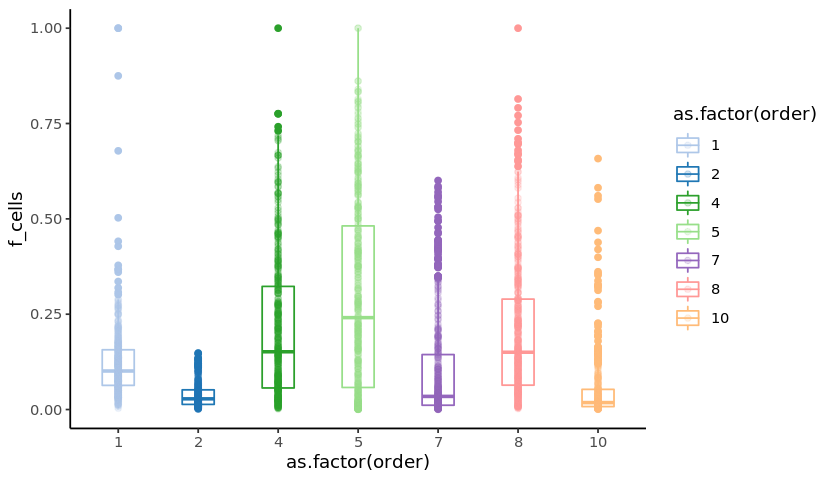

In [11]:
options(repr.plot.width=7, repr.plot.height=4)
df0 = df[df$celltype %in% c("DA","Sert","Astro","Epen1","U_Neur1","FPP","P_FPP"),]
ggplot(df0, aes(x = as.factor(order), y = f_cells, colour = as.factor(order)))+ geom_boxplot(width = 0.4) + 
        geom_point(alpha = 0.2) + scale_color_manual(values = cols[unique(df0$order)]) + theme_classic() 

In [12]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/main_figures/"
pdf(paste0(fig_dir,"Fig2a.pdf"), width=7, height=4)
ggplot(df0, aes(x = as.factor(order), y = f_cells, colour = as.factor(order)))+ geom_boxplot(width = 0.4) + 
        geom_point(alpha = 0.2) + scale_color_manual(values = cols[unique(df0$order)]) + theme_classic() 
dev.off()

png 
  2